In [ ]:
# Instale a API do Kaggle no ambiente do Colab
!pip install kaggle

# Faça o upload do seu arquivo kaggle.json (contendo suas credenciais Kaggle) para o Colab
from google.colab import files
files.upload()

# Mova o arquivo kaggle.json para o diretório correto
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Baixe o conjunto de dados usando a API do Kaggle
!kaggle datasets download -d SE18M502/notebook-dataset

# Descompacte o arquivo zip
!unzip notebook-dataset.zip

# Agora, você pode prosseguir com o código de machine learning

    brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0    ASUS           Intel        Core i3            10th   4 GB     DDR4   
1  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3    ASUS           Intel        Core i5            10th   8 GB     DDR4   
4    ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   

      ssd      hdd       os  os_bit graphic_card_gb  weight     warranty  \
0    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
1    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
2    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
3  512 GB     0 GB  Windows  32-bit            2 GB  Casual  No warranty   
4    0 GB   512 GB  Windows  64-bit            0 GB  Casual  No warranty   

  Touchscreen msoffice  Price   rating  Number of Ratings  Number of Reviews  
0      

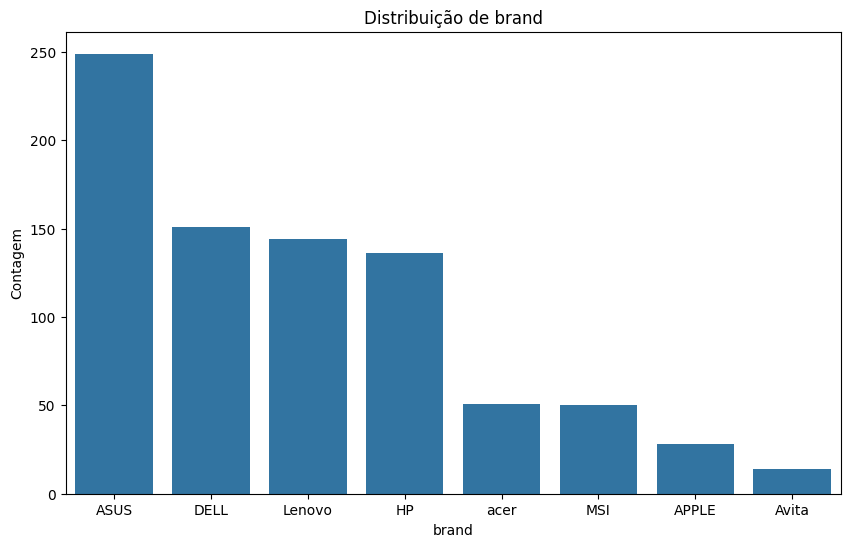

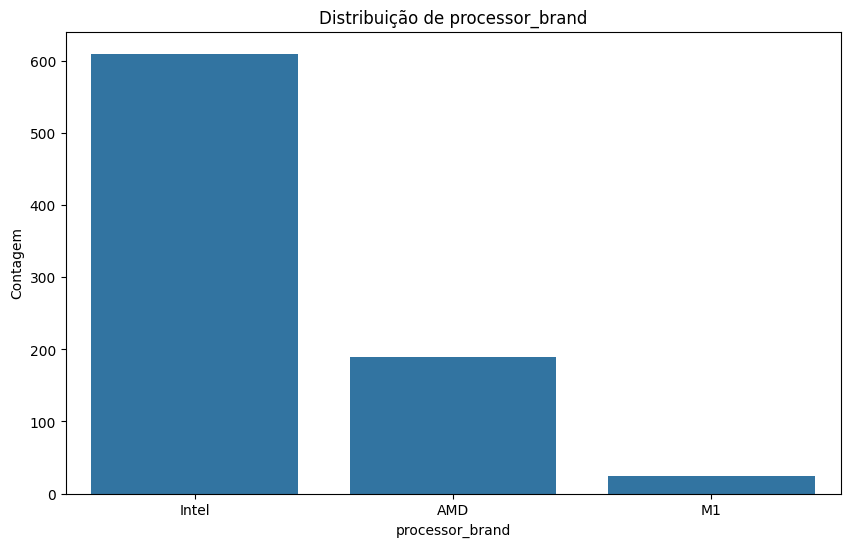

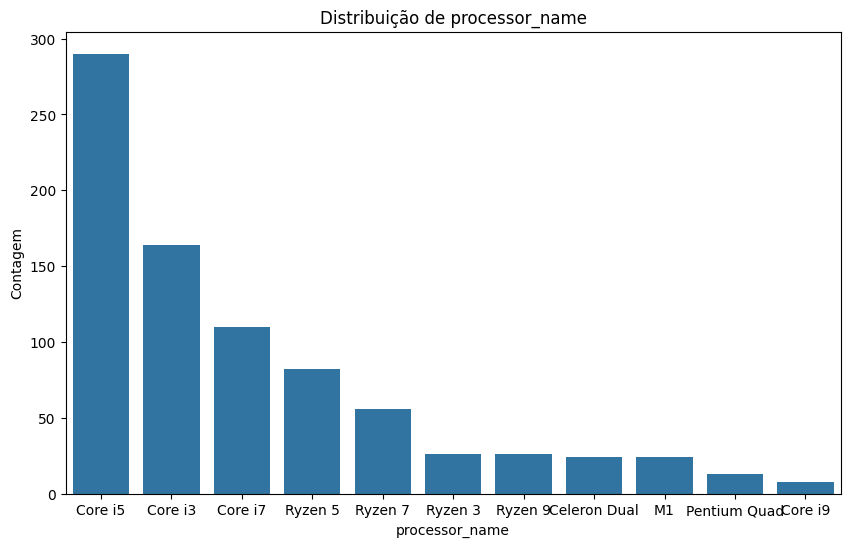

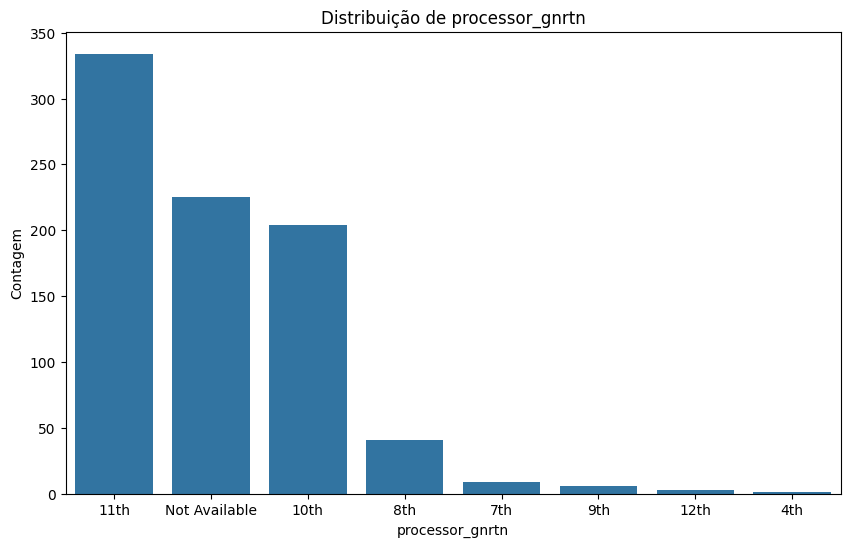

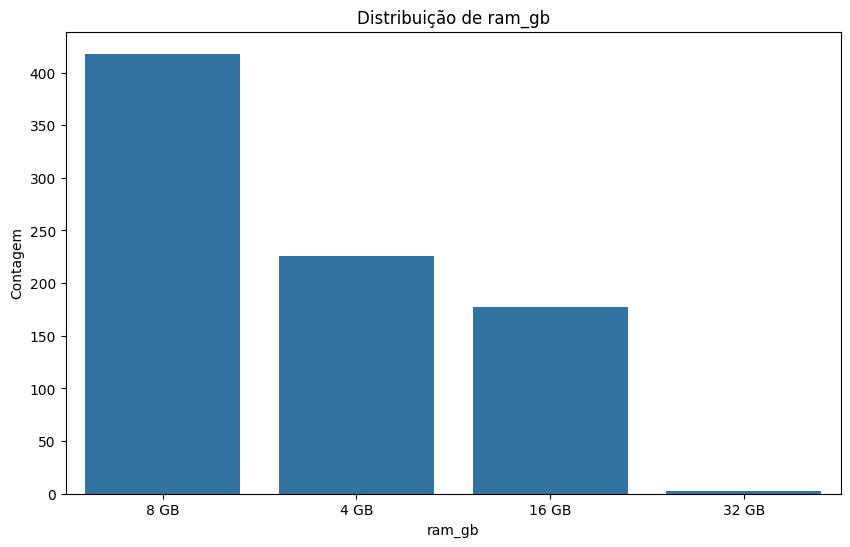

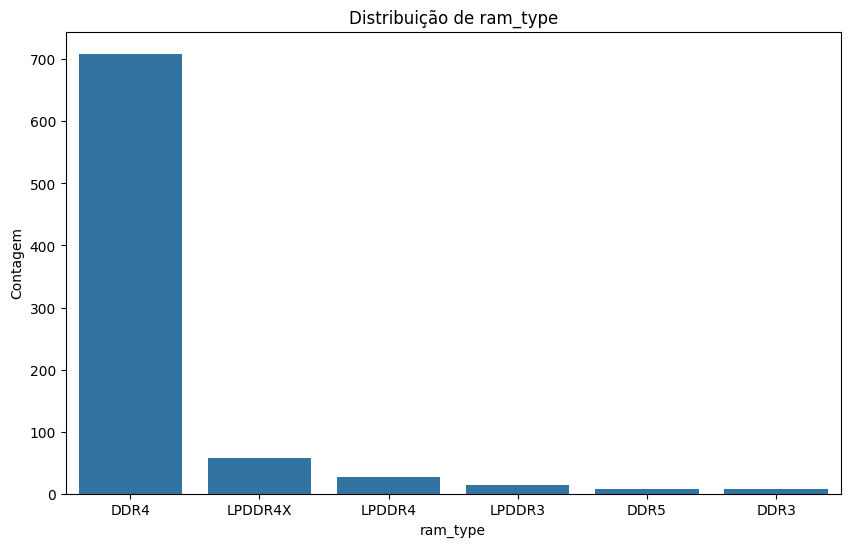

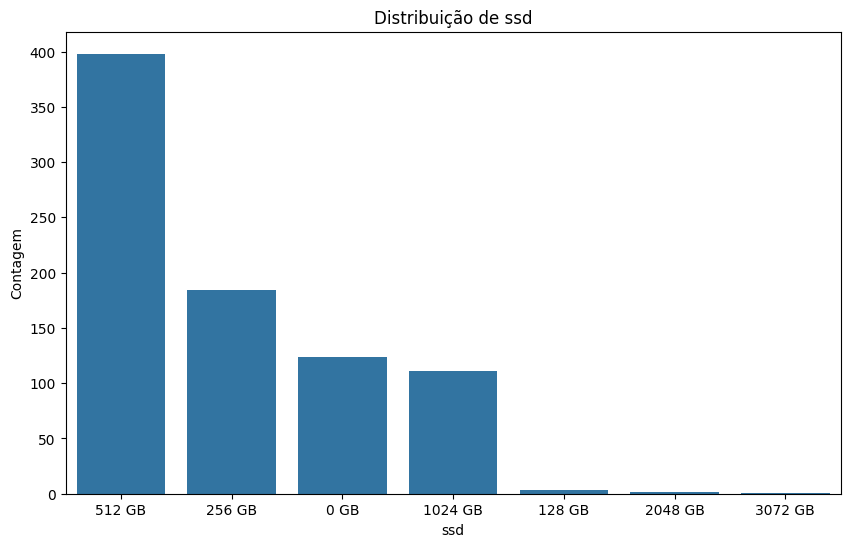

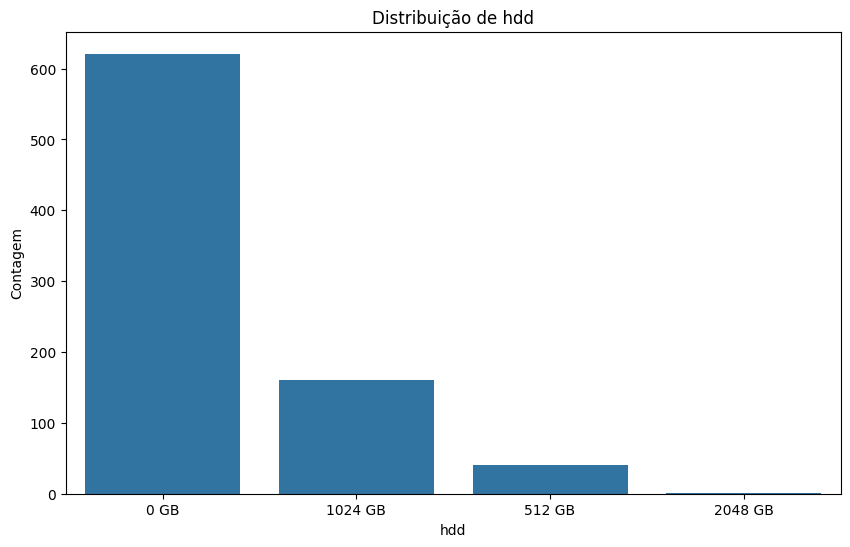

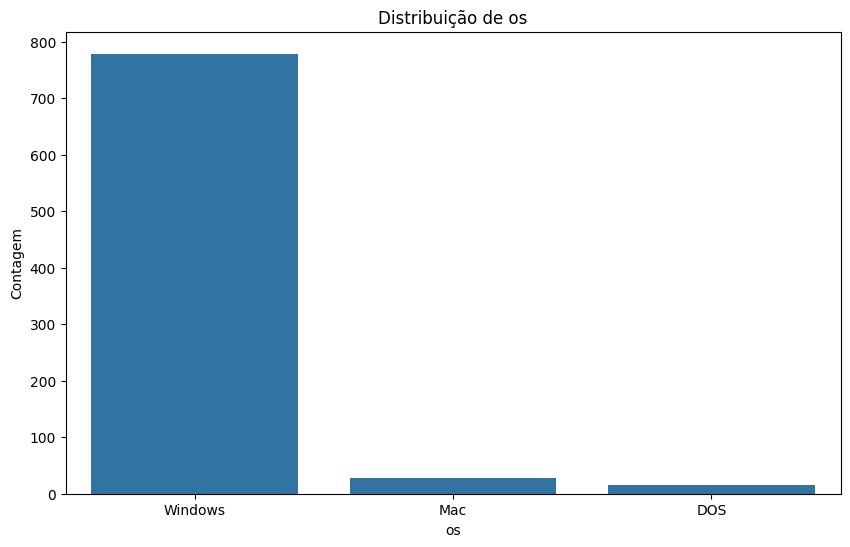

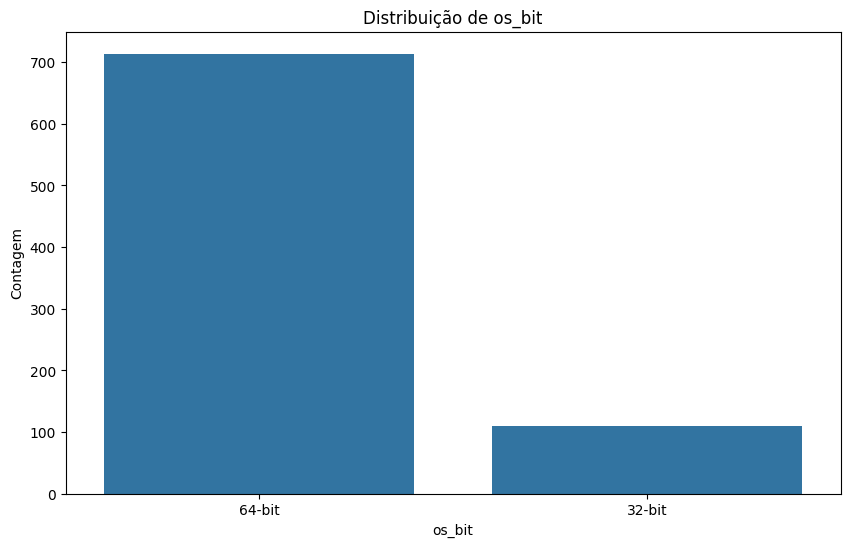

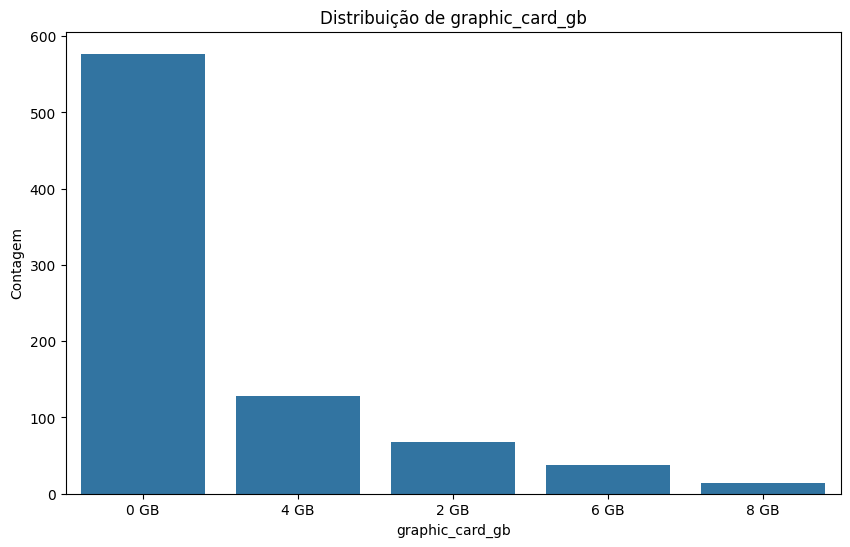

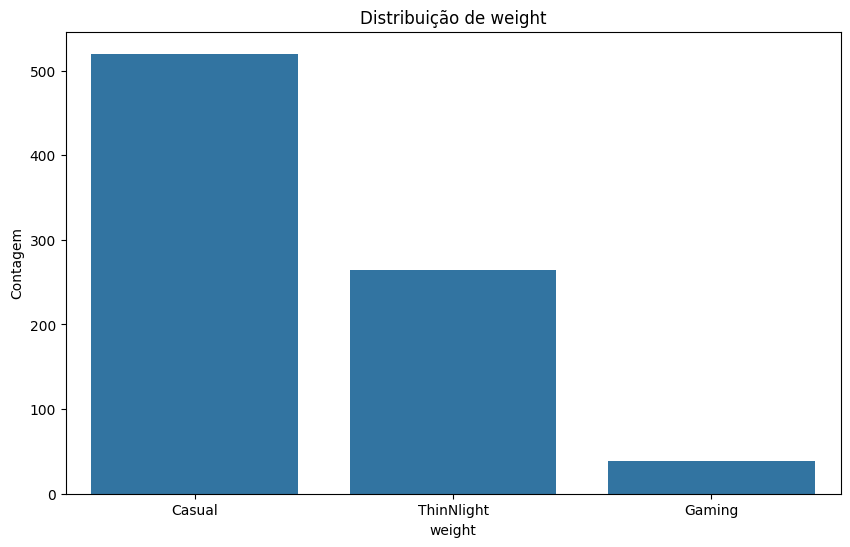

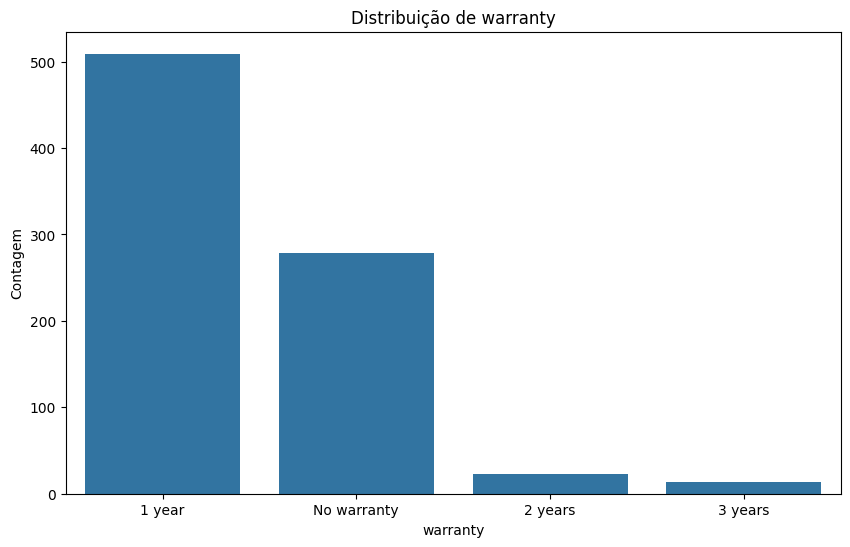

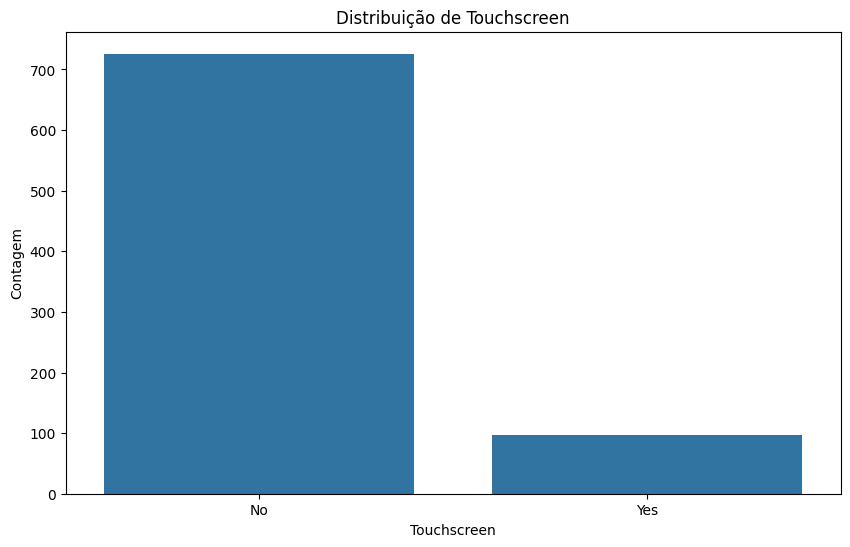

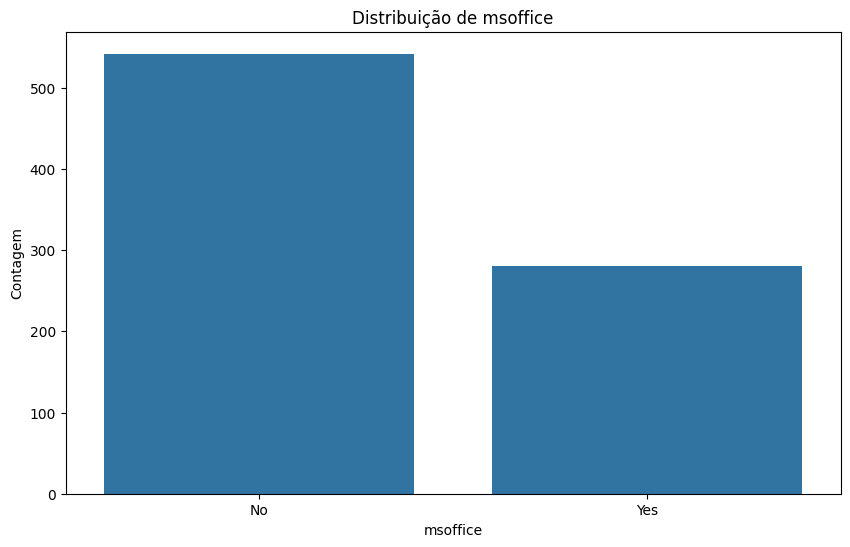

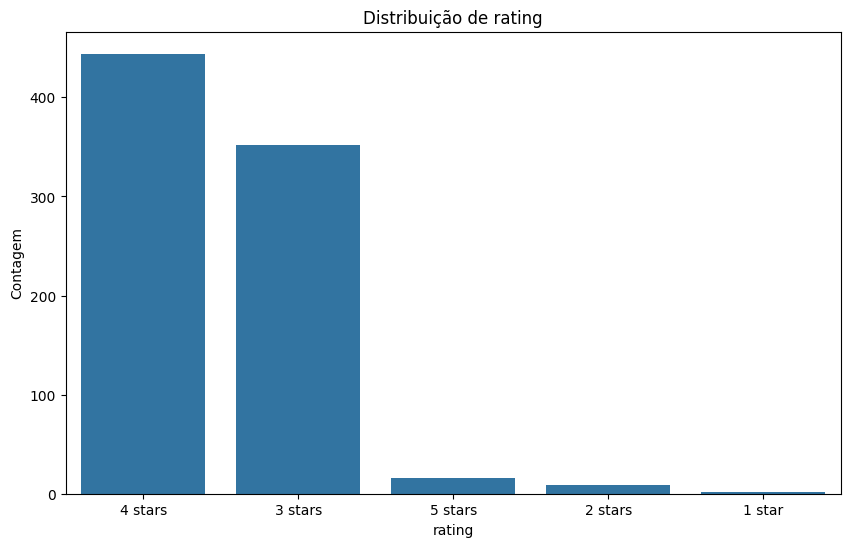

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def carregar_conjunto_de_dados(caminho_arquivo):
    """Carrega o conjunto de dados."""
    return pd.read_csv(caminho_arquivo)

def exibir_valores_mais_frequentes(df):
    """Exibe uma tabela com os valores mais frequentes em cada categoria."""
    valores_mais_comuns = {}
    colunas_categoricas = df.select_dtypes(include='object').columns

    for coluna in colunas_categoricas:
        valor_mais_comum = df[coluna].mode().values[0]
        contagem_mais_comum = df[coluna].value_counts().iloc[0]
        valores_mais_comuns[coluna] = {'Valor Mais Comum': valor_mais_comum, 'Contagem': contagem_mais_comum}

    valores_mais_comuns_df = pd.DataFrame(valores_mais_comuns).T
    print('\nValores Mais Comuns em Cada Categoria:')
    print(valores_mais_comuns_df)

def plotar_distribuicao_categorica(df):
    """Gera gráficos para visualizar a distribuição das variáveis categóricas."""
    colunas_categoricas = df.select_dtypes(include='object').columns

    for coluna in colunas_categoricas:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=coluna, data=df, order=df[coluna].value_counts().index)
        plt.title(f'Distribuição de {coluna}')
        plt.xlabel(coluna)
        plt.ylabel('Contagem')
        plt.show()

def main():
    # Carregue o conjunto de dados
    caminho_arquivo = '/content/laptopPrice.csv'
    df = carregar_conjunto_de_dados(caminho_arquivo)

    # Visualize as primeiras linhas do conjunto de dados
    print(df.head())

    # Exiba uma tabela com os valores mais frequentes em cada categoria
    exibir_valores_mais_frequentes(df)

    # Gere gráficos para visualizar a distribuição das variáveis categóricas
    plotar_distribuicao_categorica(df)

    # Remova a função de categorização e a nova coluna 'tipo_computador'
    if 'tipo_computador' in df.columns:
        df.drop('tipo_computador', axis=1, inplace=True)

if __name__ == "__main__":
    main()
